In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from matplotlib.ticker import ScalarFormatter

In [2]:
sales2022 = pd.read_excel(".\SALES REPORTS\Apr 2022- Mar 2023\Jul 2021 to Mar 2022\Data Sales Picktime Jul 21 to Mar 22.xlsx")
sales2023 = pd.read_excel(".\SALES REPORTS\Apr 2022- Mar 2023\Apr 2022 to Mar 2023\Data Sales Picktime Apr 22 to Mar 23.xlsx")

In [3]:
total_sales = pd.concat([sales2022,sales2023])

In [4]:
total_sales.tail()

,S.No,Location,Team Member,Service Type,Cost,Date,Duration,Unique Id,Booking Notes,Status,Fully Paid(Invoice),Customer Name,Email,Phone,Alternative Phone,DOB,Address
484,485,Thoraipakkam,Bathmanaban S,WEDDING HALL,16120,"Mar 26 2023, 9:30 AM",3hrs,6ohArotKXv1gi8U7VSMmRQ,INFINITY MEETING @ HALL 1&2 - 200PAX CHAIR 200...,Completed,Yes,MS. JENIFER,-,+91 91762 99635,-,-,-
485,486,Thoraipakkam,Bathmanaban S,BILLING FOR EXTRAS,3870,"Mar 27 2023, 7:00 AM",6hrs,6OyX5CZJSEFDfcdKnTn2kt,BILLING FOR EXTRAS,Completed,Yes,MR. PRAVEEN,-,+91 99623 67337,-,-,-
486,487,Thoraipakkam,Bathmanaban S,WEDDING HALL,33000,"Mar 27 2023, 7:00 AM",6hrs,7Ob0AUDKlwqPcSsFCcXSZs,AYSHAHOMAM EVENT 100PAX FUNCTION @ HALL 1&2 - ...,Completed,Yes,MR. PRAVEEN,-,+91 99623 67337,-,-,-
487,488,Thoraipakkam,Bathmanaban S,BILLING FOR EXTRAS,900,"Mar 28 2023, 11:30 AM",3hrs,3josQBicKUH7KMatyOAw6z,BILLING FOR EXTRAS,Completed,Yes,MR. JOSEPH,-,+91 90879 02526,-,-,-
488,489,Thoraipakkam,Bathmanaban S,MULTI PURPOSE HALL,10000,"Mar 28 2023, 11:30 AM",3hrs,7TsbUeZlh8uTKWUvZlgduy,GETTOGETHER EVENT 35PAX FUNCTION @ MULTI HALL ...,Completed,Yes,MR. JOSEPH,-,+91 90879 02526,-,-,-


In [5]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 488
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   S.No                 834 non-null    int64 
 1   Location             834 non-null    object
 2   Team Member          834 non-null    object
 3   Service Type         834 non-null    object
 4   Cost                 834 non-null    int64 
 5   Date                 834 non-null    object
 6   Duration             834 non-null    object
 7   Unique Id            834 non-null    object
 8   Booking Notes        801 non-null    object
 9   Status               834 non-null    object
 10  Fully Paid(Invoice)  834 non-null    object
 11  Customer Name        834 non-null    object
 12  Email                834 non-null    object
 13  Phone                834 non-null    object
 14  Alternative Phone    834 non-null    object
 15  DOB                  834 non-null    object
 16  Address      

In [6]:
total_sales.describe()

,S.No,Cost
count,834.000000,834.000000
mean,215.215827,22289.449640
std,130.631126,30732.999108
min,1.000000,0.000000
25%,105.000000,6865.000000
50%,209.000000,12495.000000
75%,313.000000,22766.250000
max,489.000000,262500.000000


In [7]:
total_sales.columns

Index(['S.No', 'Location', 'Team Member', 'Service Type', 'Cost', 'Date',
       'Duration', 'Unique Id', 'Booking Notes', 'Status',
       'Fully Paid(Invoice)', 'Customer Name', 'Email', 'Phone',
       'Alternative Phone', 'DOB', 'Address'],
      dtype='object')

### check number of dashes in dob, address and alternative phone number fields, if it the number is high then remove the columns

In [8]:
dash_count_dob = total_sales["DOB"].apply(lambda x: x.count("-")).sum()
dash_count_dob

834

In [9]:
dash_count_phone = total_sales["Alternative Phone"].apply(lambda x: x.count("-")).sum()
dash_count_phone

834

In [10]:
dash_count_address = total_sales["Address"].apply(lambda x: x.count("-")).sum()
dash_count_address

826

In [8]:
total_sales=total_sales.drop(["Address","Alternative Phone","DOB"],axis=1)

In [13]:
dash_count_email = total_sales["Email"].apply(lambda x: x.count("-")).sum()
dash_count_email

834

In [9]:
total_sales = total_sales.drop("Email",axis=1)

#### Convert date field to 2 seperate fields, date and time

In [10]:
total_sales["Date"]

0        Jul 1 2021, 7:30 AM
1        Jul 1 2021, 9:30 AM
2       Jul 3 2021, 12:00 PM
3       Jul 3 2021, 12:00 PM
4        Jul 7 2021, 7:00 AM
               ...          
484     Mar 26 2023, 9:30 AM
485     Mar 27 2023, 7:00 AM
486     Mar 27 2023, 7:00 AM
487    Mar 28 2023, 11:30 AM
488    Mar 28 2023, 11:30 AM
Name: Date, Length: 834, dtype: object

In [11]:
total_sales['Date'] = pd.to_datetime(total_sales['Date'], format='%b %d %Y, %I:%M %p')

In [12]:
total_sales['Start time'] = total_sales['Date'].dt.time

In [13]:
total_sales['Date'] = total_sales['Date'].dt.date

In [14]:
total_sales['Month'] = pd.to_datetime(total_sales['Date']).dt.month
total_sales['Year'] = pd.to_datetime(total_sales['Date']).dt.year

In [15]:
total_sales['Month'] = total_sales['Month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
total_sales.isna().sum()

S.No                    0
Location                0
Team Member             0
Service Type            0
Cost                    0
Date                    0
Duration                0
Unique Id               0
Booking Notes          33
Status                  0
Fully Paid(Invoice)     0
Customer Name           0
Phone                   0
Start time              0
Month                   0
Year                    0
dtype: int64

In [17]:
df=total_sales.groupby(["Month"])["Cost"].sum()

In [18]:
df_plot = df.reset_index(name='Average Cost')
df_plot = df_plot.sort_values(by='Average Cost', ascending=False)
df_plot

,Month,Average Cost
1,Aug,2379186
3,Feb,2314793
4,Jan,2259404
11,Sep,2249000
7,Mar,1415387
10,Oct,1240872
9,Nov,1227678
5,Jul,1136660
8,May,1104130
0,Apr,1099140


C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


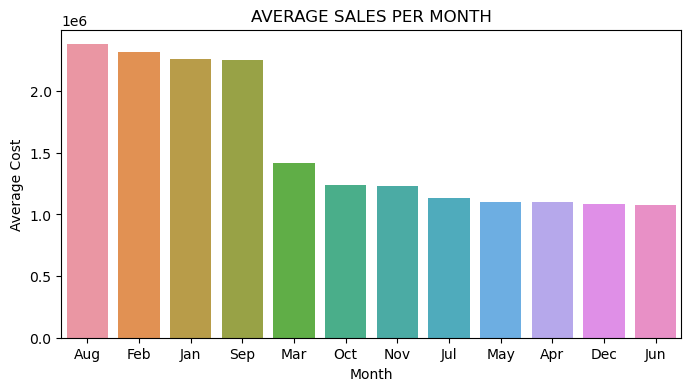

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_plot,x="Month",y="Average Cost")
plt.title("AVERAGE SALES PER MONTH")
plt.show()

In [20]:
df=total_sales.groupby(["Year","Month"])["Cost"].sum().reset_index(name="Sales")
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%b %Y')

# Sort the DataFrame based on the 'Date' column
df = df.sort_values(by='Date')
df["Year"]=df["Year"].astype(str)
df["month"]=df["Month"]+" " + df["Year"]
df

,Year,Month,Sales,Date,month
2,2021,Jul,466980,2021-07-01,Jul 2021
0,2021,Aug,919686,2021-08-01,Aug 2021
5,2021,Sep,1260330,2021-09-01,Sep 2021
4,2021,Oct,583758,2021-10-01,Oct 2021
3,2021,Nov,689568,2021-11-01,Nov 2021
1,2021,Dec,429701,2021-12-01,Dec 2021
10,2022,Jan,1149754,2022-01-01,Jan 2022
9,2022,Feb,1377338,2022-02-01,Feb 2022
13,2022,Mar,745697,2022-03-01,Mar 2022
6,2022,Apr,1099140,2022-04-01,Apr 2022


C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

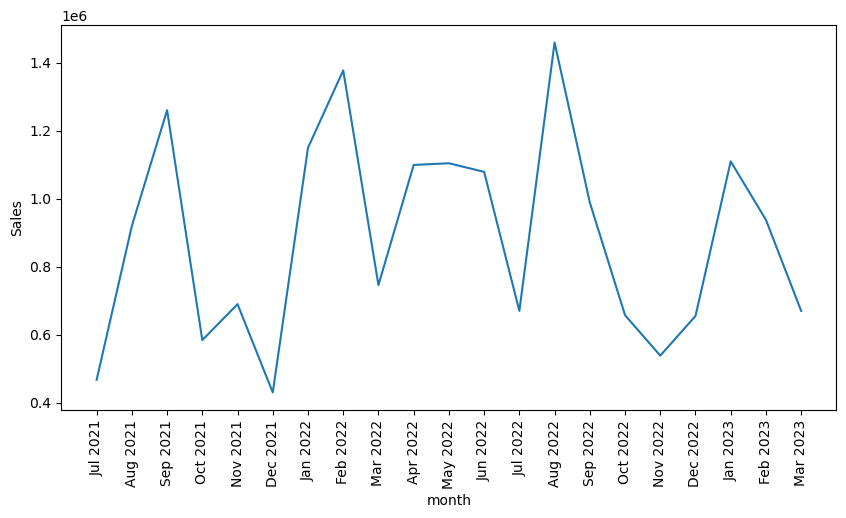

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="month",y="Sales")
plt.xticks(rotation=90)
plt.show()

In [22]:
df = total_sales.groupby("Location")["Cost"].sum().reset_index(name="Sales")

C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Location', ylabel='Sales'>

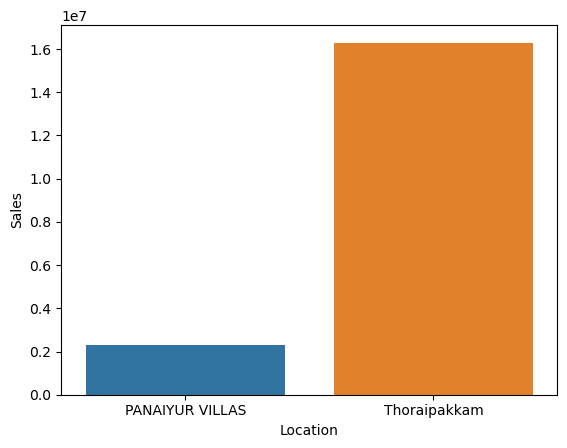

In [23]:
sns.barplot(data=df,x="Location",y="Sales")

In [24]:
df = total_sales.groupby("Service Type")["Cost"].sum().reset_index(name="Sales")

In [25]:
df=df.sort_values(by="Sales",ascending=False)

C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


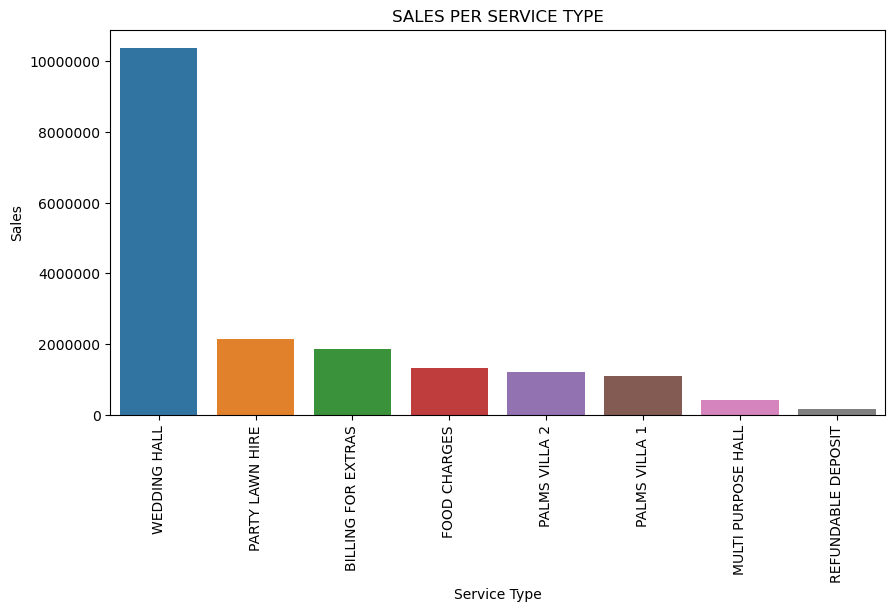

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Service Type",y="Sales")
plt.title("SALES PER SERVICE TYPE")
plt.xticks(rotation=90)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

### Wedding hall has highest sales, getting more insights in this area

In [27]:
df = total_sales[total_sales["Service Type"].str.contains("WEDDING HALL")]

In [28]:
df

,S.No,Location,Team Member,Service Type,Cost,Date,Duration,Unique Id,Booking Notes,Status,Fully Paid(Invoice),Customer Name,Phone,Start time,Month,Year
0,1,Thoraipakkam,Bathmanaban S,WEDDING HALL,28660,2021-07-01,6hrs,2Bn0cbKqfVq561DyR72af8,"50 chairs hall 1 & 2, 25 to 30 pax dining setu...",Completed,Yes,NAVANEETHA KRISHNAN,+91 95000 33009,07:30:00,Jul,2021
4,5,Thoraipakkam,Bathmanaban S,WEDDING HALL,61600,2021-07-07,6hrs,1mt5MXt3aoyr2j9GLPbxlN,CHAIRS 50 PAX refunded 5840 total recd 67500,Completed,Yes,MANGALA PREETHA,+91 97103 09769,07:00:00,Jul,2021
10,11,Thoraipakkam,Bathmanaban S,WEDDING HALL,62500,2021-07-11,6hrs,41LbTXH1q05OVWxT7P50uY,25000 CHEQUE PAID 552942 37500 CHEQUE PAID 552945,Completed,Yes,DINESH BABU,+91 98414 17992,16:00:00,Jul,2021
11,12,Thoraipakkam,Bathmanaban S,WEDDING HALL,39840,2021-07-16,4hrs,50rABzwAXXqI4YIW0r4ciH,ENGAGEMENT CHAIRS 120 NOS DINING SET UP 45 YO ...,Completed,Yes,JAMUNA,+91 99404 74371,09:00:00,Jul,2021
12,13,Thoraipakkam,Bathmanaban S,WEDDING HALL,32500,2021-07-16,6hrs,6DPVVQTR3lFt6hwTnWhmvC,HALL 1 & 2 HALL 3 DINING 131 PAX discount 20rs,Completed,Yes,MR. GANESH,+91 87780 11782,16:00:00,Jul,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,Thoraipakkam,Bathmanaban S,WEDDING HALL,16840,2023-03-19,3hrs,ZplfCBZ38fxg1Z5BiEYTe,INFINITY MEETING @ HALL 1&2 - 200PAX CHAIR 200...,Completed,Yes,MS. JENIFER,+91 91762 99635,09:30:00,Mar,2023
480,481,Thoraipakkam,Bathmanaban S,WEDDING HALL,180000,2023-03-22,24 hrs,5cpjeWtihRHTYWndmNdfNR,MARRIAGE EVENT 750 PAX FUNCTION @ LAWN - 200 C...,Completed,Yes,MR. ARJUN,+91 90879 97041,13:00:00,Mar,2023
483,484,Thoraipakkam,Bathmanaban S,WEDDING HALL,20000,2023-03-24,3hrs,7gBXx14IVmMtuLkL6hy6lB,ANNUAL DAY 100PAX FUNCTION @ HALL 1&2 - 100 CH...,Completed,Yes,MS. GAYATHRI,+91 97909 80616,17:00:00,Mar,2023
484,485,Thoraipakkam,Bathmanaban S,WEDDING HALL,16120,2023-03-26,3hrs,6ohArotKXv1gi8U7VSMmRQ,INFINITY MEETING @ HALL 1&2 - 200PAX CHAIR 200...,Completed,Yes,MS. JENIFER,+91 91762 99635,09:30:00,Mar,2023


#### Find month with most number of bookings

In [29]:
df['Time'] = pd.to_numeric(df['Duration'].str.extract(r'(\d+(\.\d+)?)')[0])

C:\Users\User\AppData\Local\Temp\ipykernel_1976\2195467117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_numeric(df['Duration'].str.extract(r'(\d+(\.\d+)?)')[0])


In [30]:
month=df.groupby(["Month","Year"]).agg({
    "Cost": "sum",
    "Time": "mean"
}).reset_index()
month=month.rename(columns={"Cost": "Sales"})
month

,Month,Year,Sales,Time
0,Apr,2022,394680,5.500000
1,Aug,2021,375530,10.083333
2,Aug,2022,807500,15.333333
3,Dec,2021,316800,12.428571
4,Dec,2022,391000,5.727273
5,Feb,2022,1009800,16.615385
6,Feb,2023,544780,9.333333
7,Jan,2022,751800,15.000000
8,Jan,2023,741040,9.909091
9,Jul,2021,225100,5.600000


In [31]:
month["date"]=pd.to_datetime(month["Month"]+" "+month["Year"].astype(str),format="%b %Y")
month["month"]=month["Month"]+" "+month["Year"].astype(str)
month=month.sort_values(by="date")
month

,Month,Year,Sales,Time,date,month
9,Jul,2021,225100,5.600000,2021-07-01,Jul 2021
1,Aug,2021,375530,10.083333,2021-08-01,Aug 2021
19,Sep,2021,723080,13.368421,2021-09-01,Sep 2021
17,Oct,2021,247500,8.000000,2021-10-01,Oct 2021
15,Nov,2021,523700,11.400000,2021-11-01,Nov 2021
3,Dec,2021,316800,12.428571,2021-12-01,Dec 2021
7,Jan,2022,751800,15.000000,2022-01-01,Jan 2022
5,Feb,2022,1009800,16.615385,2022-02-01,Feb 2022
12,Mar,2022,346400,8.571429,2022-03-01,Mar 2022
0,Apr,2022,394680,5.500000,2022-04-01,Apr 2022


C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


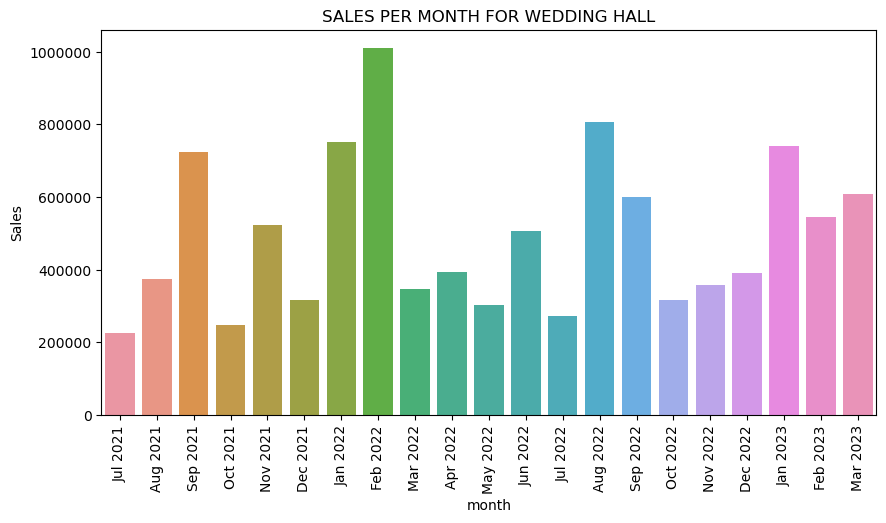

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=month,x="month",y="Sales")
plt.title("SALES PER MONTH FOR WEDDING HALL")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.show()

C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

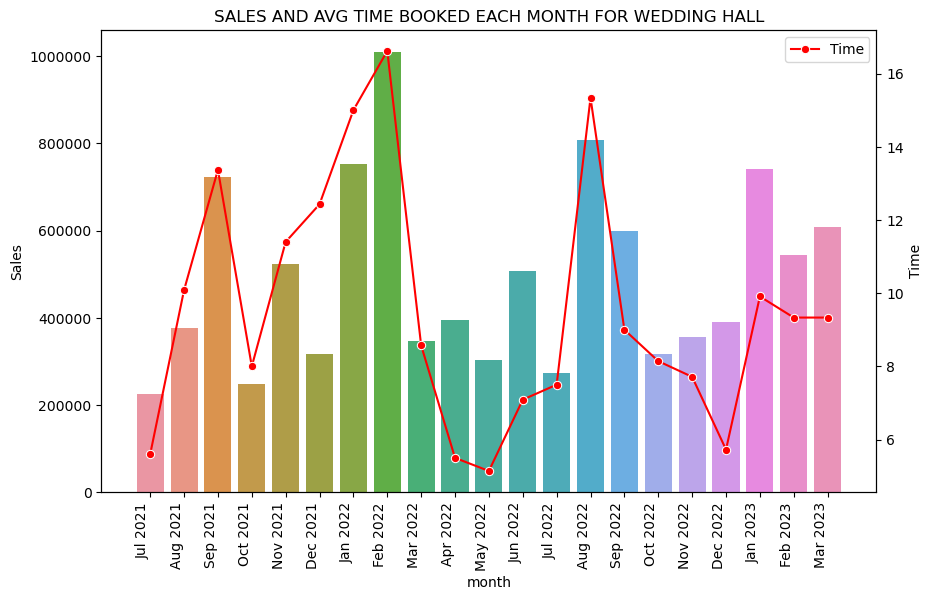

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis
sns.barplot(data=month,x='month', y='Sales',  ax=ax1, label='Sales')
# Create a second y-axis
ax2 = ax1.twinx()
# Plot the second y-axis
sns.lineplot(x='month', y='Time', data=month, ax=ax2, color='red', marker='o', label='Time')
plt.title("SALES AND AVG TIME BOOKED EACH MONTH FOR WEDDING HALL")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.show()

#### Find out based on day which sells more

In [36]:
total_sales['day_of_week'] = pd.to_datetime(total_sales['Date']).dt.day_name()



In [37]:
total_sales

,S.No,Location,Team Member,Service Type,Cost,Date,Duration,Unique Id,Booking Notes,Status,Fully Paid(Invoice),Customer Name,Phone,Start time,Month,Year,day_of_week
0,1,Thoraipakkam,Bathmanaban S,WEDDING HALL,28660,2021-07-01,6hrs,2Bn0cbKqfVq561DyR72af8,"50 chairs hall 1 & 2, 25 to 30 pax dining setu...",Completed,Yes,NAVANEETHA KRISHNAN,+91 95000 33009,07:30:00,Jul,2021,Thursday
1,2,Thoraipakkam,Bathmanaban S,MULTI PURPOSE HALL,15520,2021-07-01,6hrs,1MHXEQC8goNipzWftZh2aG,CHAIRS 30NOS DINING SET UP CLIENT END,Completed,Yes,HARSHA,+91 88839 91143,09:30:00,Jul,2021,Thursday
2,3,PANAIYUR VILLAS,Bathmanaban S,PALMS VILLA 1,12000,2021-07-03,24 hrs,69UyMSFfj1sYgzwLoso0R,1O PAX RECD 15000 PHONEPE,Completed,Yes,MR. DINESH SHARMA,+91 98407 90595,12:00:00,Jul,2021,Saturday
3,4,PANAIYUR VILLAS,Bathmanaban S,PALMS VILLA 2,12000,2021-07-03,24 hrs,xgZ9PtX83EWxx6t53m24C,10 PAX,Completed,Yes,MR. DINESH SHARMA,+91 98407 90595,12:00:00,Jul,2021,Saturday
4,5,Thoraipakkam,Bathmanaban S,WEDDING HALL,61600,2021-07-07,6hrs,1mt5MXt3aoyr2j9GLPbxlN,CHAIRS 50 PAX refunded 5840 total recd 67500,Completed,Yes,MANGALA PREETHA,+91 97103 09769,07:00:00,Jul,2021,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,Thoraipakkam,Bathmanaban S,WEDDING HALL,16120,2023-03-26,3hrs,6ohArotKXv1gi8U7VSMmRQ,INFINITY MEETING @ HALL 1&2 - 200PAX CHAIR 200...,Completed,Yes,MS. JENIFER,+91 91762 99635,09:30:00,Mar,2023,Sunday
485,486,Thoraipakkam,Bathmanaban S,BILLING FOR EXTRAS,3870,2023-03-27,6hrs,6OyX5CZJSEFDfcdKnTn2kt,BILLING FOR EXTRAS,Completed,Yes,MR. PRAVEEN,+91 99623 67337,07:00:00,Mar,2023,Monday
486,487,Thoraipakkam,Bathmanaban S,WEDDING HALL,33000,2023-03-27,6hrs,7Ob0AUDKlwqPcSsFCcXSZs,AYSHAHOMAM EVENT 100PAX FUNCTION @ HALL 1&2 - ...,Completed,Yes,MR. PRAVEEN,+91 99623 67337,07:00:00,Mar,2023,Monday
487,488,Thoraipakkam,Bathmanaban S,BILLING FOR EXTRAS,900,2023-03-28,3hrs,3josQBicKUH7KMatyOAw6z,BILLING FOR EXTRAS,Completed,Yes,MR. JOSEPH,+91 90879 02526,11:30:00,Mar,2023,Tuesday


In [49]:
df = total_sales.groupby(["day_of_week","Location"])["Cost"].sum().reset_index(name="Sales")
df = df.sort_values(by=["day_of_week","Sales"],ascending=[True, False])

In [50]:
df

,day_of_week,Location,Sales
1,Friday,Thoraipakkam,2233905
0,Friday,PANAIYUR VILLAS,343415
3,Monday,Thoraipakkam,1279650
2,Monday,PANAIYUR VILLAS,74000
5,Saturday,Thoraipakkam,3328375
4,Saturday,PANAIYUR VILLAS,1297133
7,Sunday,Thoraipakkam,4396470
6,Sunday,PANAIYUR VILLAS,219580
9,Thursday,Thoraipakkam,2081580
8,Thursday,PANAIYUR VILLAS,98583


In [52]:
total_sales.to_excel("Sales report 2021-23.xlsx",index=False)